In [2]:
from google.colab import files

uploaded=files.upload()

Saving heart.csv to heart (1).csv


In [ ]:
import pandas as pd

df=pd.read_csv('heart.csv')
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df_encoded=pd.get_dummies(df,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
df_encoded=df_encoded.astype(int)
df_encoded.head()

In [ ]:
df_encoded.drop_duplicates(inplace=True)
df_encoded.info()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df_normalized=scaler.fit_transform(df_encoded)

df_normalized=pd.DataFrame(df_normalized,columns=df_encoded.columns)
df_normalized.head()

In [9]:
from sklearn.model_selection import train_test_split

X=df_normalized.drop('HeartDisease',axis=1)
y=df_normalized['HeartDisease']

x_train,x_,y_train,y_=train_test_split(X,y,test_size=0.2,random_state=42)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.5,random_state=42)

In [10]:
#train the data first on the sklearnlogistic model
from sklearn.linear_model import LogisticRegression

lmodel=LogisticRegression()
lmodel.fit(x_train,y_train)

LogisticRegression()

In [11]:
#test performance  on the cross valdtion data
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error

y_pred=lmodel.predict(x_cv)
accuracy=accuracy_score(y_cv,y_pred)
j_cv=mean_squared_error(y_cv,y_pred)
j_train=mean_squared_error(y_train,lmodel.predict(x_train))

report=classification_report(y_cv,y_pred)
print(f"the accuracy is{accuracy}\nthe traning loss is {j_train}\nthe valdtion loss is {j_cv} ")

the accuracy is0.8804347826086957
the traning loss is 0.1307901907356948
the valdtion loss is 0.11956521739130435 


In [12]:
#second train the data on nn using dense
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.regularizers import l2
nn_model=Sequential([
      tf.keras.Input(shape=(X.shape[1],)),
      Dense(1024,activation='relu',kernel_regularizer=l2(.03)),
      Dense(512,activation='relu',kernel_regularizer=l2(.03)),
      Dense(256,activation='relu',kernel_regularizer=l2(.03)),
      Dense(128,activation='relu',kernel_regularizer=l2(.03)),
      Dense(64,activation='relu',kernel_regularizer=l2(.03)),
      Dense(32,activation='relu',kernel_regularizer=l2(.03)),
      Dense(16,activation='relu',kernel_regularizer=l2(.03)),
      Dense(1,activation='sigmoid')

])

In [13]:
nn_model.compile(optimizer=Adam(learning_rate=0.001),loss=BinaryCrossentropy(),metrics=[BinaryAccuracy()])

In [14]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │        21,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 721,409 (2.75 MB)

 Trainable params: 721,409 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
nn_model.fit(x_train,y_train,epochs=200,validation_data=(x_cv,y_cv))

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - binary_accuracy: 0.6528 - loss: 34.5699 - val_binary_accuracy: 0.8804 - val_loss: 17.0312
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8062 - loss: 13.8647 - val_binary_accuracy: 0.8478 - val_loss: 7.1064
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8406 - loss: 5.9895 - val_binary_accuracy: 0.8913 - val_loss: 3.5723
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8519 - loss: 3.1904 - val_binary_accuracy: 0.7826 - val_loss: 2.3162
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.8769 - loss: 2.0598 - val_binary_accuracy: 0.9022 - val_loss: 1.5871
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8490 - loss: 1.5092 - val_binary_accuracy: 0.8913 - val_loss: 1.2513
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8828 - loss: 1.1912 - val_binary_accuracy: 0.9022 - val_loss: 1.0321
Epoch 8

In [16]:
#test performance  on the cross valdtion data
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error

y_pred=nn_model.predict(x_cv)

y_pred_classes = (y_pred > 0.5).astype(int)
accuracy=accuracy_score(y_cv,y_pred_classes)
j_cv=mean_squared_error(y_cv,y_pred_classes)
j_train=mean_squared_error(y_train,nn_model.predict(x_train))

report=classification_report(y_cv,y_pred_classes)
print(f"the accuracy is{accuracy}\nthe traning loss is {j_train}\nthe valdtion loss is {j_cv} ")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
the accuracy is0.8913043478260869
the traning loss is 0.10151667781776708
the valdtion loss is 0.10869565217391304 


In [32]:
#the last model xgbosster model
import xgboost as xgb

xgb_model=xgb.XGBClassifier(n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1,
    reg_lambda=5,
    gamma=0.2,
    eval_metric='logloss')
xgb_model.fit(x_train,y_train, eval_set=[(x_cv, y_cv)])

[0]	validation_0-logloss:0.62911
[1]	validation_0-logloss:0.59337
[2]	validation_0-logloss:0.55789
[3]	validation_0-logloss:0.52673
[4]	validation_0-logloss:0.50329
[5]	validation_0-logloss:0.48365
[6]	validation_0-logloss:0.46938
[7]	validation_0-logloss:0.45214
[8]	validation_0-logloss:0.43563
[9]	validation_0-logloss:0.42432
[10]	validation_0-logloss:0.41873
[11]	validation_0-logloss:0.40770
[12]	validation_0-logloss:0.40030
[13]	validation_0-logloss:0.39072
[14]	validation_0-logloss:0.38198
[15]	validation_0-logloss:0.37509
[16]	validation_0-logloss:0.36753
[17]	validation_0-logloss:0.36378
[18]	validation_0-logloss:0.35604
[19]	validation_0-logloss:0.35072
[20]	validation_0-logloss:0.34421
[21]	validation_0-logloss:0.34424
[22]	validation_0-logloss:0.34400
[23]	validation_0-logloss:0.34154
[24]	validation_0-logloss:0.33788
[25]	validation_0-logloss:0.33706
[26]	validation_0-logloss:0.33163
[27]	validation_0-logloss:0.32860
[28]	validation_0-logloss:0.32307
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [33]:
from sklearn.metrics import accuracy_score

y_pred = xgb_model.predict(x_cv)
accuracy = accuracy_score(y_cv, y_pred)
j_cv=mean_squared_error(y_cv,y_pred)
j_train=mean_squared_error(y_train,xgb_model.predict(x_train))
print(f"Test Accuracy: {accuracy:.4f} \ntrain loss is{j_train:.4f}\nthe valdtion loss is{j_cv:.4f}")


Test Accuracy: 0.9130 
train loss is0.0736
the valdtion loss is0.0870


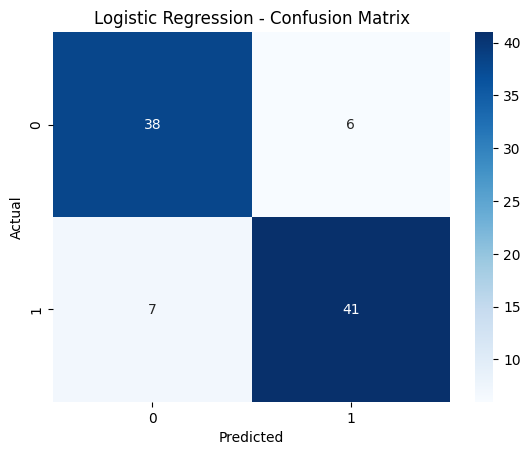

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


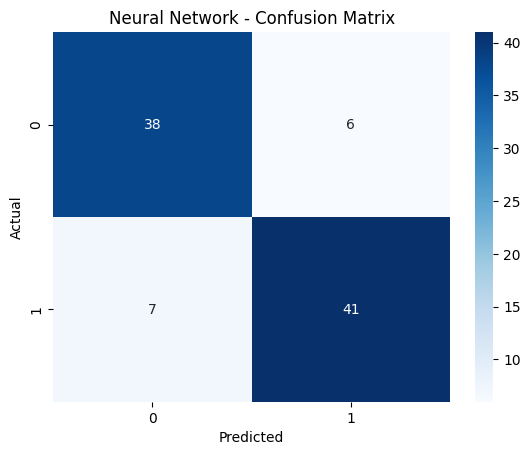

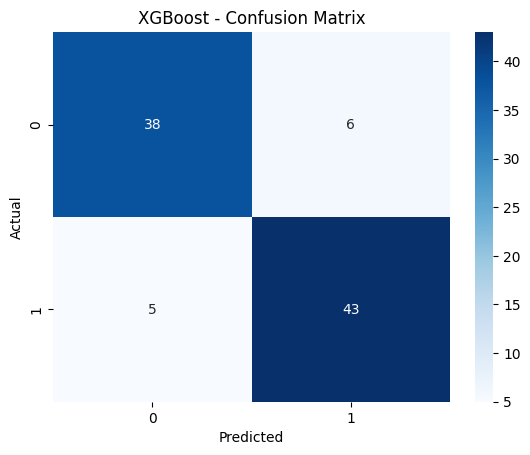

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

models = {
    "Logistic Regression": lmodel,
    "Neural Network": nn_model,
    "XGBoost": xgb_model
}

def plot_conf_matrix(model, name):
    if name == "Neural Network":
        y_pred = (model.predict(x_test) > 0.5).astype(int)
    else:
        y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

for name, model in models.items():
    plot_conf_matrix(model, name)


In [35]:
nn_model.save('models/nn_model.h5')
xgb_model.save_model('models/xgb_model.json')

In [37]:
files.download('models/nn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>